In [12]:
import os
load_dir = 'performance'
excludes = [
    # 'vanilla',
    # 'synthchain',
    'synthchain_vanilla3_no_repeat_10_1',
    'synthchain_vanilla3_no_repeat_20_1',
    'synthchain_vanilla3_no_repeat_5_1',
    'synthchain_vanilla_5_1',
    'synthchain_vanilla3_5_1',
    'synthchain_vanilla2_5_1',
    'synthchain_vanilla4_5_1',
    # 'synthchain_vanilla3_no_repeat_30_1',
    'gridpuzzle_claude_context_clue_only.gpt-4o-mini.json',
    'inli'
           # 'gridpuzzle',
    # 'deltabench'
] #['deltabench']
ands = [
    # 'multi_sources_single_sink',
    # '.better_prompt1'
    # 'synthchain',
    # '.no_cot',
    # 'save_len'
    # '.split_raw_derived',
    # 'synthchain'
]
filenames = [filename for filename in os.listdir(load_dir) \
             if filename.endswith('.json') and \
             not any([exclude in filename for exclude in excludes]) and \
            all([a in filename for a in ands])]
filenames

['synthchain_vanilla3_no_repeat_30_2.gpt-4o-mini.no_cot.json',
 'synthchain_multi_sources_single_sink_s5_d3_el2.gpt-4o-mini.no_cot.json',
 'synthchain_vanilla_20.gpt-4o-mini.split_raw_derived.json',
 'synthchain_multi_sources_single_sink_s5_d5_el2.gpt-4o-mini.no_cot.json',
 'deltabench_sections.qwen3-4b.no_cot_simple.save_len15.json',
 'prmbench.gpt-4o-mini.no_cot_simple.json',
 'synthchain_vanilla3_no_repeat_20_2.gpt-4o-mini.no_cot.json',
 'deltabench_sections.gpt-4o-mini.json',
 'prmbench.gpt-4o-mini.no_cot2.save_len15.json',
 'gridpuzzle_mistral_context_clue_only.gpt-4o-mini.better_prompt1.json',
 'gridpuzzle_gpt_context_clue_only.gpt-4o-mini.better_prompt1.json',
 'prmbench.qwen3-4b.no_cot2.json',
 'recipe_graph.qwen3-4b.no_cot2.json',
 'synthchain_vanilla3_no_repeat_10_2.gpt-4o-mini.no_cot_simple.json',
 'deltabench_sections_task_l1_general.qwen3-4b.no_cot_simple.save_len15.json',
 'synthchain_vanilla_10.gpt-4o-mini.better_prompt1.json',
 'gridpuzzle_llama_context_clue_only.gpt-4o

In [4]:
# filenames = [
#     'deltabench_sections.gpt-4o-mini.json'
# ]

In [5]:
import json

filename = filenames[0]

dataset_name, model_name = filename.split('.')[0], filename.split('.')[1]

with open(os.path.join(load_dir, filename)) as input_file:
    results = json.load(input_file)

In [13]:
import os
import json
import numpy as np
from collections import OrderedDict, defaultdict

# ── USER SETTINGS ─────────────────────────────────────────────────────────────
load_dir = 'performance'

# order+latex names for methods
name_mapping = OrderedDict([
    # ('Stability',   r'\cert{}-1'),
    ('Stability-0.95',   r'\cert{}-0.95'),
    # ('Stability-bin',   r'\cert{}-bin-1'),
    # ('Stability-bin-0.95',   r'\cert{}-bin-0.95'),
    # ('Stability-Test',   r'\cert{}-Test'),
    ('Entail-Prev', r'\entailprev{}'),
    ('Entail-Raw',  r'\entailraw{}'),
    ('LLM-Judge',   r'\llmjudge{}'),
    ('LLM-Judge-Old',   r'\llmjudge{}'),
    ('LLM-Judge-Whole',   r'\llmjudge{}'),
    ('PRM',         r'\prm{}'),
])

# map dataset IDs to nice display names
dataset_name_map = OrderedDict([
    # 'deltabench_sections': 'DeltaBench',
    # ('gridpuzzle_claude_context_clue_only.better_prompt1', 'GridPuzzle-Claude'),
    # # 'gridpuzzle_claude_context_clue_only.20': 'GridPuzzle-Claude.20',
    # ('gridpuzzle_gemini_context_clue_only.better_prompt1', 'GridPuzzle-Gemini'),
    # ('gridpuzzle_gpt_context_clue_only.better_prompt1', 'GridPuzzle-GPT'),
    # ('gridpuzzle_llama_context_clue_only.better_prompt1', 'GridPuzzle-Llama'),
    # ('gridpuzzle_mistral_context_clue_only.better_prompt1', 'GridPuzzle-Mistral'),
    # 'dataset2':            'OtherDS',
    # 'synthchain_vanilla_10': 'SynthChain10',
    # 'synthchain_vanilla_20': 'SynthChain20',
    # 'synthchain_vanilla_30': 'SynthChain30',
    # 'synthchain_vanilla_50': 'SynthChain50'
    ('synthchain_vanilla3_no_repeat_5_2.no_cot', r'\ourdata{}-5'),
    ('synthchain_vanilla3_no_repeat_10_2.no_cot', r'\ourdata{}-10'),
    ('synthchain_vanilla3_no_repeat_20_2.no_cot', r'\ourdata{}-20'),
    ('synthchain_vanilla3_no_repeat_30_2.no_cot', r'\ourdata{}-30'),
    ('synthchain_vanilla3_no_repeat_50_2.no_cot', r'\ourdata{}-50'),
    # ('synthchain_multi_sources_single_sink_s3_d3_el2', r'\ourdata{}-s3d3'),
    # ('synthchain_multi_sources_single_sink_s3_d5_el2', r'\ourdata{}-s3d5'),
    # ('synthchain_multi_sources_single_sink_s5_d3_el2', r'\ourdata{}-s5d3'),
    # ('synthchain_multi_sources_single_sink_s5_d5_el2', r'\ourdata{}-s5d5')
    # ('prmbench.no_cot2', r'PRMBench'),
    # ('prmbench.no_cot2.save_len15', r'PRMBench-15'),
    # ('deltabench_sections.no_cot3', r'DeltaBench'),
    # ('deltabench_sections.no_cot_simple', r'DeltaBench'),
    # ('deltabench_sections.no_cot3.save_len15', r'DeltaBench-15'),
    # ('inli_contradiction_step_types1_valid.no_cot2', r'INLI-Contradiction'),
    ('recipe_graph3.no_cot3', r'CaptainCook4D')
    # add more as needed...
])

# map raw model IDs to display names
model_name_map = {
    'gpt-4o-mini': 'GPT-4o-mini',
    # 'flan-t5-xxl':      'Flan-t5-xxl',
    # 'qwen2.5-math-prm-7b':      'Qwen2.5-Math-PRM-7B',
    'qwen3-4b':      'Qwen3-4B',
    # add more as needed...
}


In [14]:
# ── LOAD ALL RESULTS ───────────────────────────────────────────────────────────
results_by_model = defaultdict(dict)
# print('filenames', filenames)
for fn in filenames:
    if not fn.endswith('.json'):
        continue
    fn_name = fn.replace('.json', '')
    ds, model = fn_name.split('.')[:2]
    if len(fn_name.split('.')) >= 3:
        ds = ds + '.' + fn_name.split('.')[2]
    if len(fn_name.split('.')) >= 4:
        ds = ds + '.' + fn_name.split('.')[3]
    path = os.path.join(load_dir, fn)
    results_by_model[model][ds] = json.load(open(path))

# ── SORTED LIST OF DATASETS ───────────────────────────────────────────────────
all_datasets = sorted({ds for m in results_by_model for ds in results_by_model[m]})
n_ds = len(all_datasets)

# ── PRECOMPUTE BEST AND SECOND-BEST MEAN METRICS FOR BOLDING/UNDERLINING ─────
best_metrics = {}
for model, ds_dict in results_by_model.items():
    best_metrics[model] = {}
    for ds in all_datasets:
        means = {'rec': [], 'prec': [], 'f1': []}
        if ds in ds_dict:
            for method in name_mapping:
                if method in ds_dict[ds]:
                    r = ds_dict[ds][method]
                    # print(method, r)
                    means['rec'].append(np.mean(r['rec']))
                    means['prec'].append(np.mean(r['prec']))
                    means['f1'].append(np.mean(r['f1']))
        # find top two
        def top_two(arr):
            if not arr:
                return None, None
            uniq = sorted(set(arr), reverse=True)
            return uniq[0], (uniq[1] if len(uniq) > 1 else None)
        best_r, second_r = top_two(means['rec'])
        best_p, second_p = top_two(means['prec'])
        best_f, second_f = top_two(means['f1'])
        best_metrics[model][ds] = {
            'rec': best_r, 'second_rec': second_r,
            'prec': best_p, 'second_prec': second_p,
            'f1': best_f, 'second_f1': second_f,
        }
# ── TRANSPOSED TABLE ─────────────────────────────────────────────────────────
add_std = False
for model in sorted(results_by_model):
    disp_model = model_name_map.get(model, model)
    print(f"% Results for {disp_model}")
    print(r"\begin{tabular}{lccc}")
    print(r"\toprule")
    print(r"Dataset / Method & Recall & Precision & F1 \\")
    print(r"\midrule")
    # for ds in all_datasets:
    for ds in dataset_name_map:
        ds_disp = dataset_name_map.get(ds, ds)
        # dataset header spanning all 4 cols
        print(rf"\multicolumn{{4}}{{l}}{{\textbf{{{ds_disp}}}}} \\")
        for method_key, tex_name in name_mapping.items():
            # print('----', method_key, tex_name, '----')
            
            ds_res = results_by_model[model].get(ds, {})
            # print(ds_res.keys())
            if method_key not in ds_res:
                continue
            r = ds_res[method_key]
            rec_arr, prec_arr, f1_arr = (np.array(r[k]) for k in ("rec","prec","f1"))
            rec_m, rec_s   = rec_arr.mean(),   rec_arr.std(ddof=1)
            prec_m, prec_s = prec_arr.mean(),  prec_arr.std(ddof=1)
            f1_m, f1_s     = f1_arr.mean(),    f1_arr.std(ddof=1)

            # bold / underline logic (same as before)
            bm = best_metrics[model][ds]
            def styl(mean, std, best, second):
                if add_std:
                    cell = f"{mean:.3f} $\pm$ {std:.3f}"
                else:
                    cell = f"{mean:.3f}"
                if best is not None and abs(mean-best)<1e-12:
                    return rf"\textbf{{{cell}}}"
                if second is not None and abs(mean-second)<1e-12:
                    return rf"\underline{{{cell}}}"
                return cell

            row = " & ".join([
                tex_name,
                styl(rec_m,   rec_s,   bm["rec"],    bm["second_rec"]),
                styl(prec_m,  prec_s,  bm["prec"],   bm["second_prec"]),
                styl(f1_m,    f1_s,    bm["f1"],     bm["second_f1"])
            ]) + r" \\"

            print(row)
        print(r"\midrule")
    print(r"\bottomrule")
    print(r"\end{tabular}")
    print("\n")


% Results for flan-t5-xxl
\begin{tabular}{lccc}
\toprule
Dataset / Method & Recall & Precision & F1 \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-5}} \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-10}} \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-20}} \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-30}} \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-50}} \\
\midrule
\multicolumn{4}{l}{\textbf{CaptainCook4D}} \\
\midrule
\bottomrule
\end{tabular}


% Results for GPT-4o-mini
\begin{tabular}{lccc}
\toprule
Dataset / Method & Recall & Precision & F1 \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-5}} \\
\cert{}-0.95 & \textbf{0.861} & \textbf{0.889} & \textbf{0.854} \\
\entailprev{} & 0.704 & 0.813 & 0.673 \\
\entailraw{} & \underline{0.830} & 0.832 & \underline{0.824} \\
\llmjudge{} & 0.811 & \underline{0.864} & 0.803 \\
\midrule
\multicolumn{4}{l}{\textbf{\ourdata{}-10}} \\
\cert{}-0.95 & \textbf{0.931} & \textbf{0.936} & \textbf{0.931} \\
\entailprev{} & 0.608 & 0.783

/tmp/ipykernel_14744/3491394064.py:41: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  losers = df_full.idxmin(axis=1)


StopIteration: 

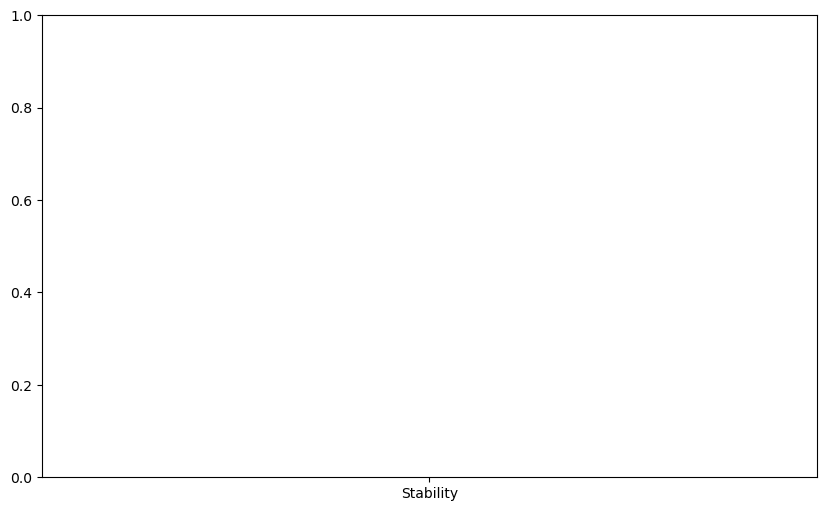

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

# Configuration: methods in the desired order
name_mapping = OrderedDict([
    ('Stability',        r'\cert{}-1'),
    ('Stability-0.95',   r'\cert{}-0.95'),
    # ('Stability-bin',    r'\cert{}-bin-1'),
    # ('Stability-bin-0.95',r'\cert{}-bin-0.95'),
    # ('Stability-Test',   r'\cert{}-Test'),
    ('Entail-Prev',      r'\entailprev{}'),
    ('Entail-Raw',       r'\entailraw{}'),
    ('LLM-Judge',        r'\llmjudge{}'),
    # ('LLM-Judge-Old',    r'\llmjudge{}-Old'),
    # ('LLM-Judge-Whole',  r'\llmjudge{}-Whole'),
    ('PRM',              r'\prm{}'),
])

# 1) Flatten results_by_model into a long DataFrame; include fold for uniqueness
records = []
for model, ds_dict in results_by_model.items():
    for ds, methods in ds_dict.items():
        for method, metrics in methods.items():
            if method not in name_mapping:
                continue
            for fold_idx, f1 in enumerate(metrics['f1']):
                slot = f"{model}__{ds}__fold{fold_idx}"
                records.append({'slot': slot, 'method': method, 'f1': f1})
df = pd.DataFrame(records)

# 2) Pivot to wide form, in the mapped-method order
df_wide = df.pivot(index='slot', columns='method', values='f1')
df_wide = df_wide.reindex(columns=name_mapping.keys())

# 3) Keep only slots where all methods are present
df_full = df_wide.dropna(axis=0, how='any')

# 4) Identify loser (lowest F1) in each fully-populated slot
losers = df_full.idxmin(axis=1)

# 5) Count losses per method
loss_counts = losers.value_counts().reindex(name_mapping.keys(), fill_value=0)

# 6) Compute percentages and 95% CI error bars
T = len(df_full)
p_prop = loss_counts / T
p_percent = p_prop * 100
se_prop = np.sqrt(p_prop * (1 - p_prop) / T)
err_percent = 1.96 * se_prop * 100

# 7) Plot percent last-rank with error bars
plt.figure(figsize=(10, 6))
plt.bar(p_percent.index, p_percent.values, yerr=err_percent.values, capsize=5)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Fully-Run Slots Ranked Last (%)')
plt.title('Percent of Slots Where Each Method Had the Lowest F1\n(Only Counting Slots with All Methods)')
plt.tight_layout()
plt.show()


In [16]:
# ── PRECOMPUTE BEST, SECOND-BEST, AND WORST MEAN METRICS ─────────────────────
best_metrics = {}
for model, ds_dict in results_by_model.items():
    best_metrics[model] = {}
    for ds in all_datasets:
        means = {'rec': [], 'prec': [], 'f1': []}
        if ds in ds_dict:
            for method in name_mapping:
                if method in ds_dict[ds]:
                    r = ds_dict[ds][method]
                    means['rec'].append(np.mean(r['rec']))
                    means['prec'].append(np.mean(r['prec']))
                    means['f1'].append(np.mean(r['f1']))

        # helper to get top two
        def top_two(arr):
            if not arr:
                return None, None
            uniq = sorted(set(arr), reverse=True)
            return uniq[0], (uniq[1] if len(uniq) > 1 else None)

        # helper to get worst (lowest)
        def worst_one(arr):
            if not arr:
                return None
            return min(set(arr))

        best_r, second_r = top_two(means['rec'])
        worst_r       = worst_one(means['rec'])
        best_p, second_p = top_two(means['prec'])
        worst_p         = worst_one(means['prec'])
        best_f, second_f = top_two(means['f1'])
        worst_f         = worst_one(means['f1'])

        best_metrics[model][ds] = {
            'rec': best_r, 'second_rec': second_r, 'worst_rec': worst_r,
            'prec': best_p,'second_prec': second_p,'worst_prec': worst_p,
            'f1': best_f, 'second_f1': second_f, 'worst_f1': worst_f,
        }


# ── SINGLE TABLE WITH WORST-ITALICS ───────────────────────────────────────────
# models     = sorted(results_by_model)
# only keep models for which we have a display name
models = [m for m in sorted(results_by_model) if m in model_name_map]
disp_models = [model_name_map[m] for m in models]

disp_models = [model_name_map.get(m, m) for m in models]
n_models   = len(models)

# build column spec: one for method, then 3 per model
col_spec = "l" + "ccc" * n_models
print(r"\begin{tabular}{" + col_spec + "}")
print(r"\toprule")

# header row 1: model names spanning 3 cols each
h1 = ["Dataset / Method"] + [rf"\multicolumn{{3}}{{c}}{{{dm}}}" for dm in disp_models]
print(" & ".join(h1) + r" \\")
# header row 2: metric labels under each model
h2        = [""] + ["Recall & Precision & F1"] * n_models
h2_expanded = [h2[0]] + sum([m.split(" & ") for m in h2[1:]], [])
print(" & ".join(h2_expanded) + r" \\")
print(r"\midrule")

for ds in dataset_name_map:
    ds_disp    = dataset_name_map.get(ds, ds)
    total_cols = 1 + 3 * n_models
    print(rf"\multicolumn{{{total_cols}}}{{l}}{{\textbf{{{ds_disp}}}}} \\")

    for method_key, tex_name in name_mapping.items():
        # skip if no model has this method on this dataset
        if not any(method_key in results_by_model[m].get(ds, {}) for m in models):
            continue

        row = [tex_name]
        for model in models:
            ds_res = results_by_model[model].get(ds, {})
            if method_key in ds_res:
                r = ds_res[method_key]
                rec_arr, prec_arr, f1_arr = (np.array(r[k]) for k in ("rec","prec","f1"))
                rec_m, rec_s   = rec_arr.mean(),   rec_arr.std(ddof=1)
                prec_m, prec_s = prec_arr.mean(),  prec_arr.std(ddof=1)
                f1_m, f1_s     = f1_arr.mean(),    f1_arr.std(ddof=1)

                bm = best_metrics[model][ds]
                def styl(mean, std, best, second, worst):
                    cell = f"{mean:.3f}"
                    if best    is not None and abs(mean-best)   < 1e-12:
                        return rf"\textbf{{{cell}}}"
                    if second  is not None and abs(mean-second) < 1e-12:
                        return rf"\underline{{{cell}}}"
                    if worst   is not None and abs(mean-worst)  < 1e-12:
                        return rf"\textit{{{cell}}}"
                    return cell

                row += [
                    styl(rec_m,   rec_s,   bm["rec"],      bm["second_rec"], bm["worst_rec"]),
                    styl(prec_m,  prec_s,  bm["prec"],     bm["second_prec"],bm["worst_prec"]),
                    styl(f1_m,    f1_s,    bm["f1"],       bm["second_f1"],  bm["worst_f1"])
                ]
            else:
                row += ["–", "–", "–"]

        print(" & ".join(row) + r" \\")
    print(r"\midrule")

print(r"\bottomrule")
print(r"\end{tabular}")


\begin{tabular}{lcccccc}
\toprule
Dataset / Method & \multicolumn{3}{c}{GPT-4o-mini} & \multicolumn{3}{c}{Qwen3-4B} \\
 & Recall & Precision & F1 & Recall & Precision & F1 \\
\midrule
\multicolumn{7}{l}{\textbf{\ourdata{}-5}} \\
\cert{}-1 & \textbf{0.881} & \textbf{0.900} & \textbf{0.873} & – & – & – \\
\cert{}-0.95 & \underline{0.861} & \underline{0.889} & \underline{0.854} & – & – & – \\
\entailprev{} & \textit{0.704} & \textit{0.813} & \textit{0.673} & – & – & – \\
\entailraw{} & 0.830 & 0.832 & 0.824 & – & – & – \\
\llmjudge{} & 0.811 & 0.864 & 0.803 & – & – & – \\
\midrule
\multicolumn{7}{l}{\textbf{\ourdata{}-10}} \\
\cert{}-1 & \textbf{0.937} & \textbf{0.943} & \textbf{0.936} & – & – & – \\
\cert{}-0.95 & \underline{0.931} & \underline{0.936} & \underline{0.931} & – & – & – \\
\entailprev{} & \textit{0.608} & 0.783 & \textit{0.538} & – & – & – \\
\entailraw{} & 0.626 & \textit{0.636} & 0.616 & – & – & – \\
\llmjudge{} & 0.767 & 0.839 & 0.750 & – & – & – \\
\midrule
\multicolumn{

In [131]:
import numpy as np
import pandas as pd
from itertools import combinations
from collections import OrderedDict
from scipy.stats import ttest_rel, wilcoxon
from statsmodels.stats.multitest import multipletests
import warnings

# === Configuration: Only include these methods, in this order ===
name_mapping2 = OrderedDict([
    ('Stability',        r'\cert{}-1'),
    ('Stability-0.95',   r'\cert{}-0.95'),
    # ('Stability-bin',    r'\cert{}-bin-1'),
    # ('Stability-bin-0.95',r'\cert{}-bin-0.95'),
    # ('Stability-Test',   r'\cert{}-Test'),
    ('Entail-Prev',      r'\entailprev{}'),
    ('Entail-Raw',       r'\entailraw{}'),
    ('LLM-Judge',        r'\llmjudge{}'),
    # ('LLM-Judge-Old',    r'\llmjudge{}-Old'),
    # ('LLM-Judge-Whole',  r'\llmjudge{}-Whole'),
    ('PRM',              r'\prm{}'),
])

warnings.filterwarnings("ignore", message="Exact p-value calculation does not work")

# === 1) Flatten into long DataFrame; include fold in slot to avoid duplicates ===
records = []
for model, ds_dict in results_by_model.items():
    for ds, methods in ds_dict.items():
        for method, metrics in methods.items():
            if method not in name_mapping2:
                continue
            for fold_idx, f1 in enumerate(metrics['f1']):
                slot = f"{model}__{ds}__fold{fold_idx}"
                records.append({
                    'slot': slot,
                    'model': model,
                    'dataset': ds,
                    'method': method,
                    'f1': f1
                })
df = pd.DataFrame(records)

# === 2) Pivot to wide form, in the mapped-methods order ===
df_wide = df.pivot(index='slot', columns='method', values='f1')
df_wide = df_wide.reindex(columns=name_mapping2.keys())

# === 3) Summary stats per method ===
summary = df_wide.agg(['mean','std']).T.reset_index().rename(columns={'index':'method'})

def bootstrap_ci(x, y, n_boot=2000, alpha=0.05):
    if len(x) < 2:
        return np.nan, np.nan
    diffs = []
    arr = np.stack([x, y], axis=1)
    n = arr.shape[0]
    for _ in range(n_boot):
        idx = np.random.randint(0, n, n)
        diffs.append(arr[idx,0] - arr[idx,1])
    return (np.percentile(diffs, 100*alpha/2),
            np.percentile(diffs, 100*(1-alpha/2)))

def tost_paired(x, y, eps=0.01):
    diff = x - y
    if len(diff) < 2:
        return np.nan, np.nan
    _, p_low = ttest_rel(diff + eps, np.zeros_like(diff))
    _, p_high = ttest_rel(eps - diff, np.zeros_like(diff))
    return p_low, p_high

# === 4) Pairwise comparisons ===
methods = list(name_mapping2.keys())
pairs = list(combinations(methods, 2))
results = []

for m1, m2 in pairs:
    paired = df_wide[[m1, m2]].dropna()
    n = len(paired)
    if n < 2:
        results.append({'pair': f"{m1} vs {m2}", **{k: np.nan for k in [
            'p_t','p_w','cohen_d','ci_lower','ci_upper','tost_p_low','tost_p_high'
        ]}})
        continue

    # tests
    t_stat, p_t = ttest_rel(paired[m1], paired[m2])
    try:
        _, p_w = wilcoxon(paired[m1], paired[m2])
    except:
        p_w = np.nan
    diff = paired[m1] - paired[m2]
    cohen_d = diff.mean() / diff.std(ddof=1) if diff.std(ddof=1) else np.nan
    lo, hi = bootstrap_ci(paired[m1].values, paired[m2].values)
    p_low, p_high = tost_paired(paired[m1], paired[m2], eps=0.01)

    results.append({
        'pair': f"{m1} vs {m2}",
        'p_t': p_t, 'p_w': p_w, 'cohen_d': cohen_d,
        'ci_lower': lo, 'ci_upper': hi,
        'tost_p_low': p_low, 'tost_p_high': p_high
    })

tt_df = pd.DataFrame(results)

# Holm correction
rej, p_corr, _, _ = multipletests(tt_df['p_t'].fillna(1), method='holm')
tt_df['p_t_holm'] = p_corr
tt_df['reject_holm'] = rej

# === 5) Display ===
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Method Performance Summary", dataframe=summary)
# tools.display_dataframe_to_user(name="Pairwise Comparisons & Equivalence", dataframe=tt_df)


# === 5) Display both tables ===
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Method Performance Summary", dataframe=summary)
# tools.display_dataframe_to_user(name="Pairwise Comparisons & Equivalence", dataframe=tt_df)
summary

,method,mean,std
0,Stability,0.570196,0.110787
1,Stability-0.95,0.718257,0.114237
2,Entail-Prev,0.645693,0.111911
3,Entail-Raw,0.710072,0.142372
4,LLM-Judge,0.493961,0.127105
5,PRM,NaN,NaN


In [132]:
tt_df

,pair,p_t,p_w,cohen_d,ci_lower,ci_upper,tost_p_low,tost_p_high,p_t_holm,reject_holm
0,Stability vs Stability-0.95,1.169967e-08,7.971900e-07,-0.773990,-0.297471,0.053411,1.938353e-07,6.638449e-10,1.520958e-07,True
1,Stability vs Entail-Prev,1.613547e-01,4.014558e-01,-0.144832,-0.249038,0.168935,5.753602e-01,2.605516e-02,1.000000e+00,False
2,Stability vs Entail-Raw,2.342148e-03,4.545078e-03,-0.330257,-0.323457,0.200410,1.072692e-02,4.274758e-04,2.342148e-02,True
3,Stability vs LLM-Judge,1.581515e-04,1.555818e-03,0.578963,-0.094741,0.467089,3.472632e-05,6.735782e-04,1.739667e-03,True
4,Stability vs PRM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,False
5,Stability-0.95 vs Entail-Prev,2.734339e-78,2.447642e-46,1.362970,-0.028144,0.132784,2.506166e-94,2.135997e-61,4.101508e-77,True
6,Stability-0.95 vs Entail-Raw,8.376109e-01,6.438769e-03,0.011124,-0.098684,0.157901,2.650517e-03,9.247151e-03,1.000000e+00,False
7,Stability-0.95 vs LLM-Judge,8.756385e-07,2.747897e-06,0.675455,-0.081588,0.462512,7.972371e-08,8.852321e-06,1.050766e-05,True
8,Stability-0.95 vs PRM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,False
9,Entail-Prev vs Entail-Raw,2.957987e-36,3.194918e-28,-0.756529,-0.156609,0.154342,2.132869e-27,1.651607e-45,4.141181e-35,True


In [68]:
tt_df

,pair,p_t,p_w,cohen_d,ci_lower,ci_upper,tost_p_low,tost_p_high,p_t_holm,reject_holm
0,Entail-Prev vs Entail-Prev3,0.267934,0.312500,-0.574980,-0.095046,0.032238,-0.808218,1.526507e-01,1.000000,False
1,Entail-Prev vs Entail-Prev4,0.523429,0.625000,0.312311,-0.088086,0.168387,0.933051,6.670086e-01,1.000000,False
2,Entail-Prev vs Entail-Prev5,0.842187,0.812500,0.094984,-0.100309,0.166161,0.443383,9.860483e-01,1.000000,False
3,Entail-Prev vs Entail-Raw,0.998269,0.708952,0.000308,-0.401326,0.166809,0.387593,7.032062e-01,1.000000,False
4,Entail-Prev vs LLM-Judge,0.452999,0.744406,0.106979,-0.341222,0.442928,1.151187,7.191155e-01,1.000000,False
5,Entail-Prev vs Stability,0.001946,0.001751,-0.491285,-0.279208,0.042635,-2.575259,2.274282e-04,0.064227,False
6,Entail-Prev vs Stability-0.95,0.000045,0.000009,-0.633052,-0.204077,0.036748,-3.330319,8.884881e-07,0.001633,True
7,Entail-Prev vs Stability-1,0.383542,0.437500,-0.437282,-0.061133,0.036758,-0.352663,1.842143e-01,1.000000,False
8,Entail-Prev3 vs Entail-Prev4,0.064808,0.062500,1.130522,0.006960,0.136150,2.973913,1.057910e-01,1.000000,False
9,Entail-Prev3 vs Entail-Prev5,0.223020,0.125000,0.644441,-0.005263,0.133923,1.839950,3.562134e-01,1.000000,False


In [55]:
results_by_model['qwen3-4b'].keys()

dict_keys(['prmbench.no_cot2', 'prmbench.no_cot2.save_len15', 'inli_contradiction_step_types1_valid.no_cot2'])

In [56]:
results_by_model[model].keys()

dict_keys(['prmbench.no_cot2', 'prmbench.no_cot2.save_len15', 'inli_contradiction_step_types1_valid.no_cot2'])

In [57]:
dataset_name_map

OrderedDict([('prmbench.no_cot2', 'PRMBench'),
             ('prmbench.no_cot2.save_len15', 'PRMBench-15'),
             ('deltabench_sections.no_cot3', 'DeltaBench'),
             ('deltabench_sections.no_cot3.save_len15', 'DeltaBench-15'),
             ('inli_contradiction_step_types1_valid.no_cot2',
              'INLI-Contradiction')])

In [58]:
# results_by_model['gpt-4o-mini']['prmbench.save_len15']

In [26]:
results_by_model['gpt-4o-mini']['deltabench_sections.save_len15']

{'Entail-Prev': {'f1': [0.7138458552993305,
   0.6732401376481392,
   0.7795546558704454,
   0.5682935682935684,
   0.7576808192873907],
  'prec': [0.7051029212375199,
   0.6695159560203808,
   0.8045587518283763,
   0.6063176128378599,
   0.7672794930366222],
  'rec': [0.7278702892199824,
   0.6781135531135531,
   0.7622155990261104,
   0.5765483810240963,
   0.7495528035775714]},
 'Entail-Raw': {'f1': [0.5932053573144251,
   0.5940979999214115,
   0.6099661805115197,
   0.5768273529056421,
   0.5908723071771403],
  'prec': [0.5901132478114315,
   0.5958067162867022,
   0.6119590848256963,
   0.5809352517985611,
   0.5951724993794987],
  'rec': [0.601774758983348,
   0.6151556776556777,
   0.6474897153891361,
   0.5762424698795181,
   0.6319057447540419]},
 'LLM-Judge': {'f1': [0.27091825788457413,
   0.4131627056672761,
   0.42857142857142855,
   0.3627450980392157,
   0.45439739413680785],
  'prec': [0.4575668710566071,
   0.35202492211838005,
   0.375,
   0.2846153846153846,
   0.4

In [ ]:
# ── FIGURE: TREND LINES WITH ±1 STD SHADE ───────────────────────────────────
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

# Option 1: using rcParams directly
plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.size']   = 8

# # Optionally customize specific elements:
# plt.rcParams['axes.titlesize']   = 8
# plt.rcParams['axes.labelsize']   = 8
# plt.rcParams['xtick.labelsize']  = 8
# plt.rcParams['ytick.labelsize']  = 8
# plt.rcParams['legend.fontsize']  = 8

ourdata_name = 'ClaimTrees'

display_name_mapping = {
    r'\cert{}': 'RES',
    r'\entailprev{}': 'EntailPrev',
    r'\entailraw{}': 'EntailRaw',
    r'\llmjudge{}': 'LLM-Judge',
    r'\prm{}': 'PRM'
}

metric_key = "f1"                                   # or "rec" / "prec"
datasets_order = list(dataset_name_map.keys())      # preserves your chosen order
x_labels       = [dataset_name_map[d].replace(r'\ourdata{}', ourdata_name).split('-')[-1] for d in datasets_order]
x_pos          = np.arange(len(datasets_order))
# x_pos = [int(item.split('-')[-1]) for item in x_labels]

plt.figure(figsize=(2.6, 2.0))
for method_key, disp_name in name_mapping.items():
    y_means, y_stds = [], []
    for ds in datasets_order:
        ds_res = results_by_model[model].get(ds, {})
        if method_key not in ds_res:
            y_means.append(np.nan)
            y_stds.append(np.nan)
            continue
        vals = np.asarray(ds_res[method_key][metric_key])
        y_means.append(vals.mean())
        y_stds.append(vals.std(ddof=1))
    
    if np.isnan(y_means[0]):
        continue

    y_means = np.array(y_means, dtype=float)
    y_stds  = np.array(y_stds,  dtype=float)

    # main line
    for k, v in display_name_mapping.items():
        disp_name = disp_name.replace(k, v)
    plt.plot(x_pos, y_means, marker="o", label=disp_name)
    # shaded ±1 σ band (Matplotlib skips NaNs automatically)
    plt.fill_between(x_pos, y_means - y_stds, y_means + y_stds,
                     alpha=0.15, linewidth=0)
plt.xticks(x_pos, x_pos)
plt.xlabel('Mutli Source Trees\n(s=# sources, d=tree depth)')
plt.xticks(x_pos, x_labels)
plt.ylabel(f"Macro-{metric_key.upper()}")
plt.ylim(0, 1)                      # adjust if necessary
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend(title="Method", bbox_to_anchor=(1.02, 1),
           loc="upper left", frameon=False)
# plt.title(f"Trend of {metric_key.upper()} across datasets\n(mean ± 1 SD)")
plt.savefig('figures/wide_chains.pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [26]:
1

1

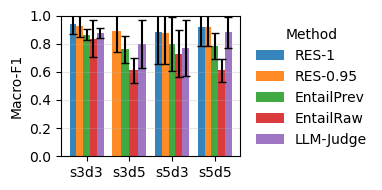

In [19]:
# ── FIGURE: TREND LINES WITH ±1 STD SHADE ───────────────────────────────────
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

# Option 1: using rcParams directly
plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.size']   = 8

# # Optionally customize specific elements:
# plt.rcParams['axes.titlesize']   = 8
# plt.rcParams['axes.labelsize']   = 8
# plt.rcParams['xtick.labelsize']  = 8
# plt.rcParams['ytick.labelsize']  = 8
# plt.rcParams['legend.fontsize']  = 8

ourdata_name = 'ClaimTrees'

display_name_mapping = {
    r'\cert{}': 'RES',
    r'\entailprev{}': 'EntailPrev',
    r'\entailraw{}': 'EntailRaw',
    r'\llmjudge{}': 'LLM-Judge',
    r'\prm{}': 'PRM'
}

metric_key = "f1"                                   # or "rec" / "prec"
datasets_order = list(dataset_name_map.keys())      # preserves your chosen order
x_labels       = [dataset_name_map[d].replace(r'\ourdata{}', ourdata_name).split('-')[-1] for d in datasets_order]
x_pos          = np.arange(len(datasets_order))
# x_pos = [int(item.split('-')[-1]) for item in x_labels]

# ── FIGURE: GROUPED BAR PLOT, CONSISTENT COLOURS ────────────────────────────
plt.figure(figsize=(2.6, 2.0))

# 1) Map every surviving method → display name
disp_names = {}
for m_key, disp in name_mapping.items():
    for k, v in display_name_mapping.items():
        disp = disp.replace(k, v)
    disp_names[m_key] = disp

# 2) Which methods have data anywhere?
methods_with_data = []
for m_key in name_mapping:
    for ds in datasets_order:
        ds_res = results_by_model[model].get(ds, {})
        if m_key in ds_res and not np.isnan(ds_res[m_key][metric_key]).all():
            methods_with_data.append(m_key)
            break                       # found data for this method

# 3) Give each method a colour
colour_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
method_colour = {
    m_key: colour_cycle[i % len(colour_cycle)]
    for i, m_key in enumerate(methods_with_data)
}

group_cent  = x_pos
group_width = 0.80                     # full width allotted per dataset
plotted_once = {m: False for m in methods_with_data}

# 4) Draw bars dataset-by-dataset
for j, ds in enumerate(datasets_order):
    # gather valid methods for this dataset
    valid = []
    for m_key in methods_with_data:
        ds_res = results_by_model[model].get(ds, {})
        if m_key not in ds_res:
            continue
        vals = np.asarray(ds_res[m_key][metric_key])
        if np.isnan(vals).all():
            continue
        valid.append((m_key, vals.mean(), vals.std(ddof=1)))

    n = len(valid)
    if n == 0:
        continue

    bar_w = group_width / n
    for k, (m_key, mean, std) in enumerate(valid):
        x = group_cent[j] - group_width/2 + (k + 0.5)*bar_w
        plt.bar(
            x, mean, width=bar_w,
            yerr=std, capsize=3, alpha=0.9,
            color=method_colour[m_key],
            label=disp_names[m_key] if not plotted_once[m_key] else None
        )
        plotted_once[m_key] = True      # only label first occurrence

# 5) Cosmetics
plt.xticks(group_cent, x_labels)
plt.ylabel(f"Macro-{metric_key.upper()}")
plt.ylim(0, 1)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.legend(title="Method", bbox_to_anchor=(1.02, 1),
           loc="upper left", frameon=False)
plt.savefig('figures/wide_chains_bar.pdf', dpi=300,
            bbox_inches='tight', pad_inches=0)
plt.show()

